<a href="https://colab.research.google.com/github/lspolatova/chinese/blob/development/creating_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
URL = 'https://chineseplus.ru/leksika-dlya-hsk?field_level_hsk_tid=All'
HEADERS = {'user-agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Mobile Safari/537.36 Edg/95.0.1020.40', 'accept': '*/*'}

def get_html(url, params=None):
    r = requests.get(url, headers=HEADERS, params=params)
    return r

def get_pages_count(html):
    soup = BeautifulSoup(html, 'html.parser')
    if(soup.find('li', class_='pager-last')):
        pagination = int(soup.find('li', class_='pager-last').find_next('a').get('href').split('=')[-1])
        return pagination
    else:
        return 1
    
def get_content(html):
    soup = BeautifulSoup(html, 'html.parser')
    items = soup.find_all('td', class_='views-field views-field-title')
    letters = set()
    for item in items:
        word = list(item.get_text(strip=True))
        for letter in word:
            letters.add(letter)
    return letters
        
def parse():
    html = get_html(URL)
    if html.status_code == 200:      
        letters = get_content(html.text)
        pages_count = get_pages_count(html.text)
        for page in range(1, pages_count + 1):
            print(f'Парсинг страницы {page + 1} из {pages_count + 1}...')
            html = get_html(URL, params={'page': page})
            letters.update(get_content(html.text))
        print(f'Получено {len(letters)} иероглифов')
        return letters
    else:
        print('Error')

letters = parse()

Парсинг страницы 2 из 50...
Парсинг страницы 3 из 50...
Парсинг страницы 4 из 50...
Парсинг страницы 5 из 50...
Парсинг страницы 6 из 50...
Парсинг страницы 7 из 50...
Парсинг страницы 8 из 50...
Парсинг страницы 9 из 50...
Парсинг страницы 10 из 50...
Парсинг страницы 11 из 50...
Парсинг страницы 12 из 50...
Парсинг страницы 13 из 50...
Парсинг страницы 14 из 50...
Парсинг страницы 15 из 50...
Парсинг страницы 16 из 50...
Парсинг страницы 17 из 50...
Парсинг страницы 18 из 50...
Парсинг страницы 19 из 50...
Парсинг страницы 20 из 50...
Парсинг страницы 21 из 50...
Парсинг страницы 22 из 50...
Парсинг страницы 23 из 50...
Парсинг страницы 24 из 50...
Парсинг страницы 25 из 50...
Парсинг страницы 26 из 50...
Парсинг страницы 27 из 50...
Парсинг страницы 28 из 50...
Парсинг страницы 29 из 50...
Парсинг страницы 30 из 50...
Парсинг страницы 31 из 50...
Парсинг страницы 32 из 50...
Парсинг страницы 33 из 50...
Парсинг страницы 34 из 50...
Парсинг страницы 35 из 50...
Парсинг страницы 36 из

In [ ]:
import re
#letters = set()
import codecs
with codecs.open('/root/chinese-word-list.txt', encoding = 'utf-8') as f:
    for line in f:
        line = re.sub("^\s+|\n|\r|0|3|5|\s+$", '', line)
        for chin in re.findall(r'[\u3400-\u4BDF\u4E00-\u9FFF\uF900-\uFAFF\u3400-\u4BDF\u4E00-\u9FFF\uF900-\uFAFF]', line):
            for letter in line:
                letters.add(letter)
#print(letters)
f.closed

True

In [ ]:
print(len(letters))

8193


In [ ]:
print(letters)

{'荸', '子', '喘', '谌', '泾', '汜', '衩', '狒', '读', '筝', '唡', '潢', '呆', '党', '业', '孳', '梘', '轸', '偃', '栅', '鲶', '继', '糕', '址', '嘻', '乂', '妥', '踭', '哀', '谒', '搡', '鲞', '蜜', '岈', '錡', '赉', '椵', '曝', '斐', '锸', '跪', '徳', '圜', '肉', '庄', '痼', '伕', '是', '拈', '驭', '帻', '钶', '番', '厘', '牞', '俭', '椥', '朂', '蟆', '遢', '奋', '霈', '术', '勳', '遨', '藠', '骹', '疟', '堵', '牍', '粗', '镟', '茸', '挂', '絮', '昌', '甩', '舛', '晔', '济', '诹', '葬', '栋', '鱿', '瘌', '醒', '苋', '姻', '琥', '刘', '唁', '欵', '吩', '珠', '佯', '已', '珣', '剁', '彦', '潜', '摚', '啮', '沆', '川', '吠', '糈', '氰', '邮', '逶', '惝', '鸪', '侨', '钠', '甭', '赎', '峃', '颈', '磡', '猝', '烊', '罎', '勖', '訄', '咴', '惭', '茫', '侭', '邑', '甑', '芽', '啕', '诞', '毒', '裢', '忞', '囔', '攉', '蚍', '伲', '炝', '柴', '骇', '哱', '阚', '菑', '鹑', '罪', '暾', '餍', '近', '如', '滂', '宥', '练', '谆', '蛳', '勺', '辞', '脚', '殓', '恓', '购', '酥', '牘', '乱', '陪', '承', '刷', '硫', '琉', '酗', '琯', '行', '屑', '铠', '艿', '蒽', '羡', '狉', '橥', '聘', '窑', '柘', '哞', '豨', '泸', '湴', '伟', '曼', '载', '保', '揭', '菏', '呃', '憋', '哿', '达', '陡', '癔', '迨',

In [ ]:
import numpy
from PIL import Image, ImageFilter, ImageDraw, ImageFont
counter = 0
X_data = []
for letter in letters:
    img = Image.new('RGB', (40, 40), 'white')
    idraw = ImageDraw.Draw(img)
    line = ImageFont.truetype('/root/simsun.ttc', size = 30, encoding='utf-8')
    idraw.text((5, 5), letter, font = line, fill = 'black')
    X_data.append(numpy.asarray(img))
    counter = counter + 1
    if(not counter%1000):
        print(f'Создано картинок {counter} из {len(letters)}...')

Создано картинок 1000 из 8193...
Создано картинок 2000 из 8193...
Создано картинок 3000 из 8193...
Создано картинок 4000 из 8193...
Создано картинок 5000 из 8193...
Создано картинок 6000 из 8193...
Создано картинок 7000 из 8193...
Создано картинок 8000 из 8193...


In [ ]:
X_data = np.array(X_data)

In [ ]:
X_data.shape

(8193, 40, 40, 3)

In [ ]:
y = range(0, len(letters))

In [ ]:
letters = list(letters)

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

print(tf.__version__)

2.7.0


In [ ]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(X_data, y, test_size=0.3)

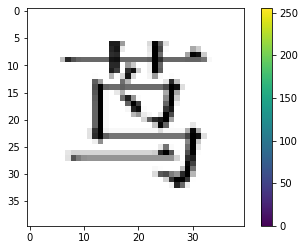

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

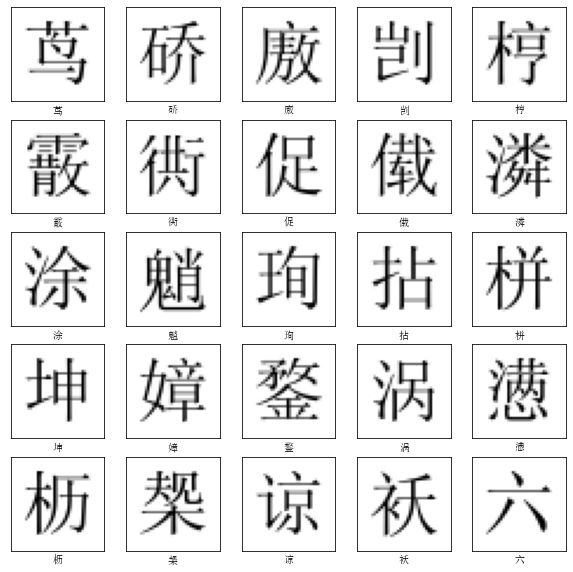

In [ ]:
prop = font_manager.FontProperties(fname='/root/simsun.ttc')
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(letters[train_labels[i]], fontproperties=prop)
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(40, 40, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(letters))
])